# Using deep features to train an image classifier

In [16]:
import turicreate

# Load some data

In [17]:
image_train = turicreate.SFrame('https://static.turi.com/datasets/coursera/deep_learning/image_train_data')
image_test = turicreate.SFrame('https://static.turi.com/datasets/coursera/deep_learning/image_test_data')

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/dir_archive.ini to /var/tmp/turicreate-kashar/10407/dad7c5bf-f364-49b1-8910-b26eb124ce8d.ini

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/objects.bin to /var/tmp/turicreate-kashar/10407/9b64f165-1a2b-457f-a5ce-2e95a2434414.bin

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.frame_idx to /var/tmp/turicreate-kashar/10407/45fdc2b8-5007-4e06-9f9b-2b7f4260644e.frame_idx

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.sidx to /var/tmp/turicreate-kashar/10407/719469db-592d-4856-b1a9-009d3c85c092.sidx

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_test_data/dir_archive.ini to /var/tmp/turicreate-kashar/10407/d0883d2c-fabf-44c8-b2af-f52f28566455.ini

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_test_data/objects.bin to /var/tmp/turicreate-kashar/10407/354489e7-66cd-47d9-8c55-f084600b55e6.bin

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_test_data/m_686d0b1bd5620cb1.frame_idx to /var/tmp/turicreate-kashar/10407/ae2f80f8-1804-44ec-bd23-65285d8090e2.frame_idx

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_test_data/m_686d0b1bd5620cb1.sidx to /var/tmp/turicreate-kashar/10407/f7588023-5603-4212-92e0-44f913cd3f32.sidx

# Explore this image data

/home/kashar/ml-venv/lib/python3.7/site-packages/turicreate/visualization/_plot.py:376: UserWarning: Displaying only the first 100 rows.
  warnings.warn('Displaying only the first {} rows.'.format(maximum_rows))


Downloading https://static.turi.com/datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.0000 to /var/tmp/turicreate-kashar/10407/dd012e0e-82a7-4236-b7ea-bcf1743b8f43.0000


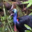
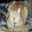
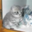
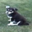
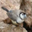
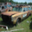
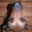
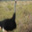
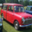
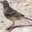
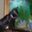
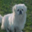
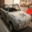
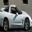
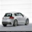
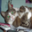
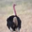
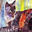
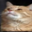
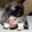
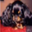
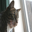
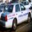
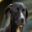
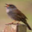
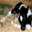
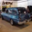
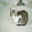
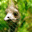
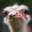
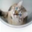
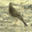
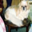
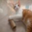
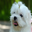
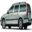
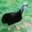
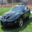
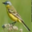
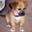
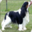
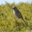
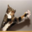
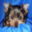
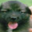
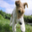
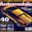
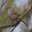
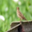
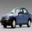
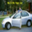
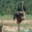
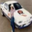
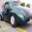
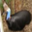
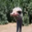
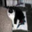
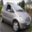
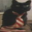
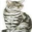
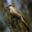
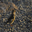
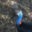
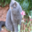
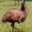
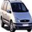
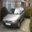
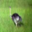
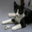
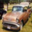
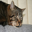
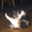
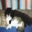
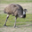
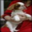
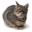
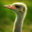
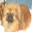
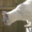
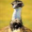
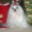
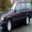
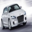
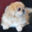
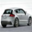
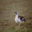
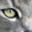
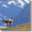
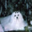
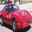
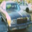
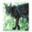
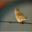
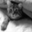
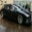
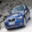
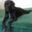
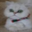
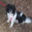
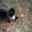

In [18]:
image_train['image'].explore()

# Train an image classifier on raw image pixels

In [19]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.020333  | 1.158410     | 0.272584          | 0.237624            |

| 1         | 10       | 1.728333  | 1.286208     | 0.382353          | 0.376238            |

| 2         | 11       | 1.728333  | 1.339655     | 0.392857          | 0.405941            |

| 3         | 17       | 0.542638  | 1.505470     | 0.438550          | 0.465347            |

| 4         | 23       | 2.492403  | 1.676138     | 0.444853          | 0.475248            |

| 9         | 36       | 0.372614  | 2.162565     | 0.516282          | 0.534653            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make predictions using simple raw pixel model

Downloading https://static.turi.com/datasets/coursera/deep_learning/image_test_data/m_686d0b1bd5620cb1.0000 to /var/tmp/turicreate-kashar/10407/3499b3d8-33ac-4d49-bb5c-c2405c36b0a0.0000


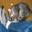
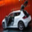
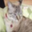

In [20]:
image_test[0:3]['image'].explore()

In [21]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [22]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# Evaluate the raw pixel model on the test data

In [23]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.47, 'auc': 0.7255813333333332, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |  138  |
 |     bird     |       dog       |  204  |
 |     dog      |       cat       |  203  |
 |  automobile  |       bird      |   76  |
 |     bird     |       bird      |  469  |
 |     cat      |       bird      |  176  |
 |     dog      |       bird      |  211  |
 |     cat      |    automobile   |  203  |
 |     cat      |       cat       |  279  |
 |     dog      |       dog       |  448  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.4619810350034158, 'log_loss': 1.2046738766084109, 'precision': 0.46

# Train image classifier using deep features

In [24]:
len(image_train)

2005

In [32]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [26]:
image_train

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 2005

Data:
+-----+----------------------+------------+-------------------------------+
|  id |        image         |   label    |         deep_features         |
+-----+----------------------+------------+-------------------------------+
|  24 | Height: 32 Width: 32 |    bird    | [0.24287176132202148, 1.09... |
|  33 | Height: 32 Width: 32 |    cat     | [0.5250879526138306, 0.0, ... |
|  36 | Height: 32 Width: 32 |    cat     | [0.5660159587860107, 0.0, ... |
|  70 | Height: 32 Width: 32 |    dog     | [1.129795789718628, 0.0, 0... |
|  90 | Height: 32 Width: 32 |    bird    | [1.7178692817687988, 0.0, ... |
|  97 | Height: 32 Width: 32 | automobile | [1.5781855583190918, 0.0, ... |
| 107 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.2206778526306... |
| 121 | Height: 32 Width: 32 |    bird    | [0.0, 0.23753464221954346,... |
| 136 | Height: 32 Width: 32 | automobile | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 138 | Height: 32 Width: 32 |    bird    | [0.6589357256889343, 0.0, ... |
+-----+----------------------+------------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [73.0, 77.0, 58.0, 71.0, 6... |
| [7.0, 5.0, 8.0, 7.0, 5.0, ... |
| [169.0, 122.0, 65.0, 131.0... |
| [154.0, 179.0, 152.0, 159.... |
| [216.0, 195.0, 180.0, 201.... |
| [33.0, 44.0, 27.0, 29.0, 4... |
| [97.0, 51.0, 31.0, 104.0, ... |
| [93.0, 96.0, 88.0, 102.0, ... |
| [35.0, 59.0, 53.0, 36.0, 5... |
| [205.0, 193.0, 195.0, 200.... |
+-------------------------------+
[2005 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

# Given the deep features, train a logistic classifier

In [27]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                           target='label',
                                                           features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.134875     | 0.729517          | 0.722772            |

| 1         | 6        | 0.250000  | 0.316040     | 0.759979          | 0.772277            |

| 2         | 14       | 2.498975  | 0.699638     | 0.779937          | 0.801980            |

| 3         | 15       | 2.498975  | 0.797526     | 0.620273          | 0.603960            |

| 4         | 17       | 1.270067  | 0.945775     | 0.787290          | 0.712871            |

| 9         | 24       | 1.000000  | 1.512498     | 0.960084          | 0.831683            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the deep features classifier on the first few images


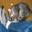
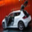
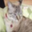

In [28]:
image_test[0:3]['image'].explore()

In [29]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

# Quantitatively evaluate deep features classifier on test data

In [30]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.78575, 'auc': 0.9382414999999986, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       cat       |  117  |
 |     bird     |       dog       |   70  |
 |     dog      |       cat       |  187  |
 |     cat      |       bird      |   89  |
 |  automobile  |       dog       |   12  |
 |     cat      |    automobile   |   18  |
 |     dog      |       bird      |   54  |
 |  automobile  |       cat       |   13  |
 |     dog      |    automobile   |   9   |
 |     bird     |    automobile   |   12  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.7859131318877924, 'log_loss': 0.6708172786857266, 'precision': 0